<a href="https://colab.research.google.com/github/Sagu12/all-projects/blob/master/PYCARET_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pycaret

#details of some important terms

To find the accuracy use the following formula---> true positives + true negatives / total sum of true and false positives and negatives of actual values.

Precision is calculated as proportion of correct positive results / all predictive positive results.

Recall is the proportion of positive cases or no. of positive predicted cases / total no. of actual positive cases


F1 score is defined as the weighted average of the harmonic mean of precision and recall.

Mathematically 
f1 score is represented as =
2 * precision * recall / (precision + recall)

AUC- Area under the curve

ROC- Receiver Operating Characteristics

True Positive rate-   True Positive / True Positive + False Negative

False Positive rate-  False Positive / False Positive + True Negative

In [6]:
# Importing dataset
from pycaret.datasets import get_data
diabetes = get_data('diabetes')


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = diabetes, target = 'Class variable')


 
Setup Succesfully Completed!


,Description,Value
0,session_id,5260
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [12]:
# comparing all models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.770800,0.000000,0.556400,0.731300,0.624000,0.465300
1,Linear Discriminant Analysis,0.761400,0.815000,0.545600,0.711600,0.611700,0.445200
2,Logistic Regression,0.759700,0.812200,0.551800,0.700000,0.611200,0.442700
3,Extreme Gradient Boosting,0.754000,0.820500,0.589200,0.676800,0.624200,0.444100
4,CatBoost Classifier,0.744700,0.833000,0.562300,0.667200,0.602900,0.418800
5,Light Gradient Boosting Machine,0.744600,0.810400,0.583000,0.655200,0.612300,0.424400
6,Gradient Boosting Classifier,0.742800,0.818000,0.567800,0.661400,0.604200,0.417200
7,Random Forest Classifier,0.735600,0.794300,0.461100,0.689100,0.540700,0.368800
8,Extra Trees Classifier,0.733600,0.782700,0.492100,0.662700,0.557200,0.375200
9,Ada Boost Classifier,0.727800,0.796100,0.572500,0.629100,0.593000,0.391000


In [13]:
# creating XG BOOST regression model
XG = create_model("xgboost")


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7963,0.8511,0.5789,0.7857,0.6667,0.5248
1,0.7593,0.7910,0.5263,0.7143,0.6061,0.4384
2,0.8148,0.9293,0.6842,0.7647,0.7222,0.5840
3,0.7222,0.7263,0.4211,0.6667,0.5161,0.3350
4,0.7222,0.8466,0.5263,0.6250,0.5714,0.3682
5,0.7963,0.8015,0.6316,0.7500,0.6857,0.5367
6,0.7778,0.8496,0.5789,0.7333,0.6471,0.4882
7,0.7170,0.8159,0.6667,0.5714,0.6154,0.3936
8,0.6981,0.7921,0.6667,0.5455,0.6000,0.3614
9,0.7358,0.8016,0.6111,0.6111,0.6111,0.4111


In [29]:
# tuning LightGBM Model
XG = tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7593,0.8406,0.5789,0.6875,0.6286,0.4524
1,0.7778,0.7910,0.6316,0.7059,0.6667,0.5008
2,0.8519,0.9068,0.7368,0.8235,0.7778,0.6672
3,0.7222,0.7023,0.5263,0.6250,0.5714,0.3682
4,0.7222,0.8211,0.4737,0.6429,0.5455,0.3520
5,0.8333,0.8195,0.5789,0.9167,0.7097,0.6010
6,0.7593,0.8556,0.6316,0.6667,0.6486,0.4658
7,0.6981,0.8143,0.5000,0.5625,0.5294,0.3083
8,0.6226,0.7762,0.5556,0.4545,0.5000,0.2018
9,0.7170,0.8238,0.6111,0.5789,0.5946,0.3774


In [32]:
XG

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.16, max_delta_step=0, max_depth=80,
              min_child_weight=2, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=5260,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=0)

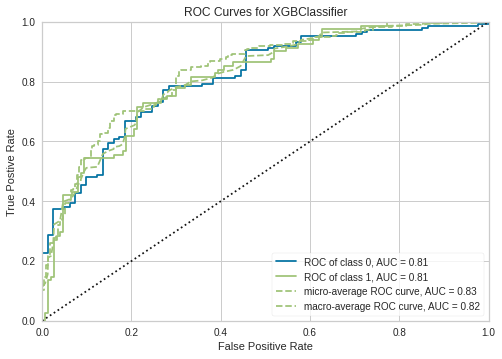

In [41]:
# plotting a model
plot_model(XG)

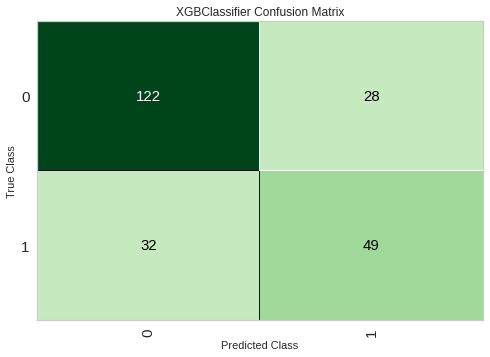

In [43]:
plot_model(XG, plot='confusion_matrix')

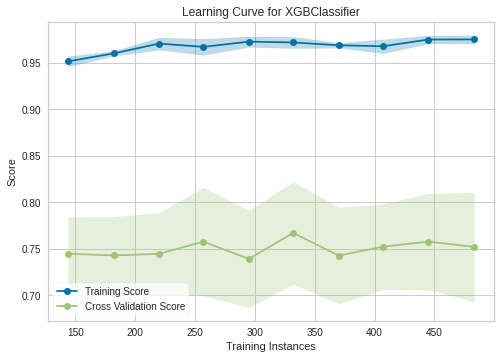

In [44]:
plot_model(XG, plot='learning')

In [18]:
# save a model
save_model(XG, 'XG_saved_07032020')

Transformation Pipeline and Model Succesfully Saved


In [20]:
# Loading the saved model
XG_saved = load_model('XG_saved_07032020')

Transformation Pipeline and Model Sucessfully Loaded


In [0]:
# predict on hold-out
#pred_holdout = predict_model(XG)